In [2]:
import vaex

In [3]:
df = vaex.example()

wget failed, using urlretrieve


In [5]:
df

#,id,x,y,z,vx,vy,vz,E,L,Lz,FeH
0,0,1.2318683862686157,-0.39692866802215576,-0.598057746887207,301.1552734375,174.05947875976562,27.42754554748535,-149431.40625,407.38897705078125,333.9555358886719,-1.0053852796554565
1,23,-0.16370061039924622,3.654221296310425,-0.25490644574165344,-195.00022888183594,170.47216796875,142.5302276611328,-124247.953125,890.2411499023438,684.6676025390625,-1.7086670398712158
2,32,-2.120255947113037,3.326052665710449,1.7078403234481812,-48.63423156738281,171.6472930908203,-2.079437255859375,-138500.546875,372.2410888671875,-202.17617797851562,-1.8336141109466553
3,8,4.7155890464782715,4.5852508544921875,2.2515437602996826,-232.42083740234375,-294.850830078125,62.85865020751953,-60037.0390625,1297.63037109375,-324.6875,-1.4786882400512695
4,16,7.21718692779541,11.99471664428711,-1.064562201499939,-1.6891745328903198,181.329345703125,-11.333610534667969,-83206.84375,1332.7989501953125,1328.948974609375,-1.8570483922958374
...,...,...,...,...,...,...,...,...,...,...,...
"329,995",21,1.9938701391220093,0.789276123046875,0.22205990552902222,-216.92990112304688,16.124420166015625,-211.244384765625,-146457.4375,457.72247314453125,203.36758422851562,-1.7451677322387695
"329,996",25,3.7180912494659424,0.721337616443634,1.6415337324142456,-185.92160034179688,-117.25082397460938,-105.4986572265625,-126627.109375,335.0025634765625,-301.8370056152344,-0.9822322130203247
"329,997",14,0.3688507676124573,13.029608726501465,-3.633934736251831,-53.677146911621094,-145.15771484375,76.70909881591797,-84912.2578125,817.1375732421875,645.8507080078125,-1.7645612955093384
"329,998",18,-0.11259264498949051,1.4529125690460205,2.168952703475952,179.30865478515625,205.79710388183594,-68.75872802734375,-133498.46875,724.000244140625,-283.6910400390625,-1.8808952569961548


In [7]:
df.x.values

array([ 1.2318684 , -0.16370061, -2.120256  , ...,  0.36885077,
       -0.11259264, 20.79622   ], dtype=float32)

In [8]:
import numpy as np

In [9]:
np.sqrt(df.x**2 + df.y*2 + df.z)

Expression = sqrt((((x ** 2) + (y * 2)) + z))
Length: 330,000 dtype: float32 (expression)
-------------------------------------------
     0  0.354379
     1   2.66089
     2   3.58545
     3   5.80162
     4   8.66098
      ...       
329995   2.40336
329996   4.11198
329997   4.74988
329998   2.25554
329999   20.9286

In [10]:
df['r'] = np.sqrt(df.x**2 + df.y**2 + df.z**2)
df[['x', 'y', 'z', 'r']]

#,x,y,z,r
0,1.2318683862686157,-0.39692866802215576,-0.598057746887207,1.425736665725708
1,-0.16370061039924622,3.654221296310425,-0.25490644574165344,3.666757345199585
2,-2.120255947113037,3.326052665710449,1.7078403234481812,4.298235893249512
3,4.7155890464782715,4.5852508544921875,2.2515437602996826,6.952032566070557
4,7.21718692779541,11.99471664428711,-1.064562201499939,14.03902816772461
...,...,...,...,...
"329,995",1.9938701391220093,0.789276123046875,0.22205990552902222,2.155872344970703
"329,996",3.7180912494659424,0.721337616443634,1.6415337324142456,4.127851963043213
"329,997",0.3688507676124573,13.029608726501465,-3.633934736251831,13.531896591186523
"329,998",-0.11259264498949051,1.4529125690460205,2.168952703475952,2.613041877746582


In [16]:
df.select(df.x < 0)
df.select(df.x > 0)

In [17]:
df.evaluate(df.y, selection = True)

array([-0.39692867,  4.585251  , 11.994717  , ...,  0.7213376 ,
       13.029609  , -3.3313878 ], dtype=float32)

In [20]:
counts_x = df.count(binby=df.x, limits=[-10,10], shape=200)
counts_x

array([ 462,  418,  447,  414,  430,  445,  436,  463,  466,  532,  468,
        516,  557,  524,  574,  551,  550,  558,  617,  592,  574,  604,
        649,  620,  661,  676,  713,  760,  707,  724,  798,  772,  845,
        841,  899,  867,  961,  939, 1017,  996, 1009, 1080, 1035, 1143,
       1127, 1164, 1157, 1169, 1271, 1205, 1324, 1375, 1356, 1383, 1361,
       1492, 1433, 1556, 1476, 1588, 1595, 1579, 1699, 1693, 1695, 1771,
       1775, 1876, 1910, 1961, 1933, 2077, 2102, 2063, 2116, 2117, 2149,
       2253, 2281, 2295, 2381, 2437, 2390, 2359, 2406, 2416, 2479, 2444,
       2588, 2494, 2442, 2665, 2744, 2692, 2812, 2784, 2815, 2707, 2641,
       2585, 2540, 2700, 2675, 2839, 2754, 2860, 2722, 2675, 2549, 2539,
       2621, 2544, 2492, 2455, 2362, 2362, 2475, 2321, 2311, 2275, 2277,
       2264, 2209, 2156, 2187, 2110, 1979, 2104, 2042, 1969, 1957, 1953,
       1873, 1856, 1854, 1729, 1665, 1688, 1596, 1533, 1502, 1560, 1443,
       1442, 1420, 1413, 1310, 1284, 1295, 1276, 12

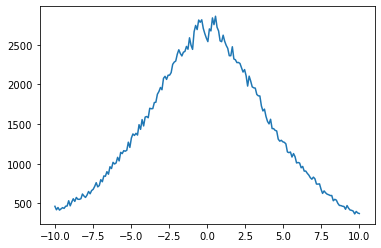

In [21]:
import matplotlib.pylab as plt
plt.plot(np.linspace(-10,10,200), counts_x)
plt.show()

In [23]:
xycounts = df.count(binby=[df.x, df.y], limits = [[-10,10], [-10,20]], shape=(64, 128))
xycounts

array([[ 5,  2,  3, ...,  3,  3,  0],
       [ 8,  4,  2, ...,  5,  3,  2],
       [ 5, 11,  7, ...,  3,  3,  1],
       ...,
       [ 4,  8,  5, ...,  2,  0,  2],
       [10,  6,  7, ...,  1,  1,  2],
       [ 6,  7,  9, ...,  2,  2,  2]], dtype=int64)

In [27]:
xycounts.shape

(64, 128)

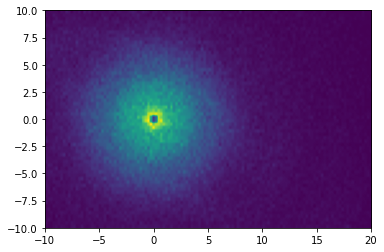

In [26]:
plt.imshow(xycounts, origin='lower', extent=[-10,20,-10,10])
plt.show()